# EDA_S 
File Ipynb yang berisi EDA dan pelatihan Model pada Data Statis

# Daftar Isi

1. [Import Library and Dependency](#IMPORTLIBRARY)
2. [Extract Raw Landmark](#EXTRACT-RAW-LANDMARK)
3. [Combined Dataset](#COMBINED-DATASET-I)
4. [Fungsi Normalisasi](#FUNGSI-NORMALISASI)
5. [File And Folder](#FILE-AND-FOLDER-EXPLAINED)
6. [Drop Kolom Tertentu](#DROP-KOLOM-TERTENTU)
7. [Preprocessing Data pada CSV](#PREPROCESSING-DATA-PADA-CSV)
8. [Extract Data with Normalisation](#EXTRACT-DATA-WITH-NORMALISATION)
9. [Import Library to Create Model Architecture](#IMPORT-LIBRARY-TO-CREATE-MODEL-ARCHITECTURE)
10. [Split Data](#SPLIT-DATA)
11. [Create Label Map untuk Implementasi Nanti dan Save to PKL and Load](#CREATE-LABEL-MAP-UNTUK-IMPLEMENTASI-NANTI-DAN-SAVE-TO-PKL-AND-LOAD)
12. [Encoded and to Categori Label](#ENCODED-AND-TO-CATEGORI-LABEL)
13. [Transform DataFrame Pandas CSV to Numpy Array](#TRANSFORM-DATAFRAME-PANDAS-CSV-TO-NUMPY-ARRAY)


# IMPORT LIBRARY

In [4]:
import os
import pandas as pd
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import numpy as np
import tensorflow as tf0

import pandas as pd

2025-05-10 22:02:50.407601: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-10 22:02:50.558775: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746889370.641691    4382 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746889370.668377    4382 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746889370.796565    4382 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

## EXTRACT RAW LANDMARK

In [97]:
import os
import pandas as pd
import mediapipe as mpfil
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2

# Direktori gambar


# Inisialisasi MediaPipe HandLandmarker
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(
    base_options=base_options,
    num_hands=2,
    running_mode=vision.RunningMode.IMAGE
)
detector = vision.HandLandmarker.create_from_options(options)
max_images = 38
path = 'img'

# Data untuk DataFrame
folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f)) and not f.startswith('.')]
folders=['z']
data = []
for target in folders:
    
    data_separated =[]
    image_directory = path+"/"+target
    img_path = sorted([f for f in os.listdir(image_directory) if f.endswith(('.jpg', '.png'))],key=lambda x: int(x.split('.')[0])) 
    a=1
    # img_path = [sorted([f for f in os.listdir(image_directory) if f.endswith(('.jpg', '.png'))],key=lambda x: int(x.split('.')[0]))[i] for i in [2, 40, 70,112]]
    for img in img_path:
        image_path = os.path.join(image_directory, img)
        image = cv2.imread(image_path )
        
        if image is None:
            print(f"Gagal membuka {image_path } i")
            continue
    
        # Konversi ke RGB untuk MediaPipe
        frame_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)
    
        # Deteksi tangan
        detection_result = detector.detect(mp_image)
        if not detection_result.hand_landmarks:
            print(f"Tidak ada tangan terdeteksi dalam {image_path } in label {target} ")
            os.remove(image_path)
         
        
        # Format data sesuai permintaan
        for hand_idx, hand in enumerate(detection_result.hand_landmarks):
     
            x_coords  = np.array([landmark.x for landmark in hand])
            y_coords = np.array([landmark.y for landmark in hand])
            z_coords = np.array([landmark.z for landmark in hand])

            row_data = {f"X{idx}": x for idx, x in zip(range(21),x_coords)}
            row_data.update({f"Y{idx}": y for idx, y in zip(range(21),y_coords)})
            row_data.update({f"Z{idx}": z for idx,z in zip(range(21),z_coords)})
            
            
            row_data["Sample Num"] = a
            row_data["Label"] = target
            

            data.append(row_data)
            data_separated.append(row_data)
        a+=1
    pd.DataFrame(data_separated).to_csv(f'csv_separated/static/{target}/pure.csv',index=False)
    print('next')
df = pd.DataFrame(data)
print('selesai')

I0000 00:00:1746896506.225261    4382 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1746896506.226751  394341 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: Mesa Intel(R) Graphics (RPL-S)
W0000 00:00:1746896506.245453  394344 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1746896506.259589  394350 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


next
selesai


In [17]:
df.to_csv(f'csv/static/pure.csv',index=False)

## COMBINED DATASET I
* Menggabungkan Dataset pada file csv di semua folder yang ada didalam direktori **csv_separated/static** *

In [98]:
# Tentukan path ke folder utama
folder_path = 'csv_separated/static/'
# folder_path = 'csv_separated/angka/'
# Daftar untuk menyimpan DataFrame yang dibaca dari setiap file CSV
dfs = []

# Loop untuk mencari semua file 'pure.csv' dalam subfolder
for root, dirs, files in os.walk(folder_path):
    if 'pure.csv' in files:  # Cek jika ada file 'pure.csv' di folder tersebut
        file_path = os.path.join(root, 'pure.csv')  # Dapatkan path lengkap file
        df = pd.read_csv(file_path)  # Baca file CSV
        dfs.append(df)  # Tambahkan DataFrame ke dalam list

# Gabungkan semua DataFrame secara vertikal
combined_df = pd.concat(dfs, ignore_index=True)

# Simpan hasil gabungan ke dalam file baru (misalnya 'combined_pure.csv')
combined_df.to_csv('csv/static/pure.csv', index=False)

print("Penggabungan selesai! File disimpan dengan nama 'combined_pure.csv'")

Penggabungan selesai! File disimpan dengan nama 'combined_pure.csv'


In [15]:
df = pd.read_csv('csv_separated/angka/titik/pure.csv')
df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Sample Num,Label
0,0.254282,0.327569,0.377404,0.351012,0.290836,0.344270,0.337857,0.340832,0.341920,0.295675,...,-0.027655,-0.061845,-0.075178,-0.075484,-0.037640,-0.060164,-0.067015,-0.067270,1,titik
1,0.278144,0.348619,0.399805,0.380309,0.324560,0.366909,0.362039,0.367706,0.366957,0.318644,...,-0.026346,-0.057128,-0.068359,-0.067404,-0.037278,-0.056616,-0.061879,-0.060964,2,titik
2,0.307278,0.373972,0.428036,0.416791,0.363796,0.391103,0.386037,0.395147,0.393565,0.343444,...,-0.031913,-0.061052,-0.070387,-0.068704,-0.042430,-0.063148,-0.069241,-0.068755,3,titik
3,0.301815,0.368061,0.422138,0.415346,0.361173,0.384891,0.378800,0.388489,0.389061,0.336701,...,-0.033412,-0.064247,-0.072699,-0.070425,-0.044378,-0.065955,-0.071458,-0.070688,4,titik
4,0.282829,0.349927,0.399580,0.382175,0.326279,0.364495,0.358810,0.365505,0.366256,0.316976,...,-0.028226,-0.058030,-0.067803,-0.065806,-0.039263,-0.058188,-0.062696,-0.061009,5,titik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.277146,0.329509,0.364196,0.343807,0.299967,0.346478,0.342900,0.342538,0.335413,0.309070,...,-0.021119,-0.045204,-0.054065,-0.054343,-0.026302,-0.041809,-0.043875,-0.042228,111,titik
111,0.243805,0.310951,0.361250,0.365126,0.318592,0.339763,0.344734,0.355133,0.354371,0.301135,...,-0.022421,-0.039864,-0.050452,-0.054408,-0.033516,-0.047402,-0.053279,-0.055458,112,titik
112,0.241557,0.305792,0.350882,0.345407,0.295993,0.331015,0.330394,0.342029,0.344380,0.290435,...,-0.028354,-0.051737,-0.063883,-0.067588,-0.038103,-0.053902,-0.059766,-0.061661,113,titik
113,0.230343,0.298052,0.344912,0.345336,0.299191,0.313065,0.308647,0.322514,0.326814,0.273508,...,-0.028631,-0.049788,-0.061275,-0.065302,-0.039899,-0.056716,-0.063922,-0.066518,114,titik


In [7]:
df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Sample Num,Label
0,0.000000,0.262496,0.517449,0.727365,0.932612,0.393235,0.650800,0.842551,1.000000,0.262918,...,-0.057151,-0.089256,-0.074899,-0.058334,-0.070132,-0.088469,-0.077601,-0.066305,1,g
1,0.000000,0.258327,0.518769,0.732461,0.938293,0.400590,0.659534,0.850493,1.009012,0.266458,...,-0.057848,-0.089363,-0.074848,-0.058618,-0.070955,-0.088610,-0.077117,-0.065674,2,g
2,0.000000,0.274816,0.536315,0.752159,0.959339,0.424794,0.685993,0.879157,1.036404,0.290968,...,-0.061454,-0.093907,-0.078565,-0.061478,-0.074942,-0.093178,-0.081417,-0.069630,3,g
3,0.000000,0.262680,0.530018,0.743118,0.945634,0.420651,0.681977,0.869163,1.021759,0.293636,...,-0.059761,-0.091205,-0.077570,-0.062268,-0.071356,-0.088959,-0.078023,-0.067256,4,g
4,0.000000,0.243609,0.507713,0.718878,0.923239,0.392374,0.652716,0.841197,0.996312,0.267018,...,-0.056987,-0.088836,-0.075183,-0.059511,-0.068158,-0.086596,-0.076351,-0.065696,5,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4978,0.259353,0.050070,0.000000,0.107602,0.208105,0.293042,0.337817,0.358921,0.377701,0.469353,...,0.001035,0.001243,0.001868,0.002784,0.003031,0.002410,0.002608,0.004013,125,lihat1
4979,0.250245,0.022892,0.000000,0.107176,0.212584,0.208738,0.315439,0.378562,0.425505,0.394287,...,0.025437,0.041651,0.049387,0.053944,0.024894,0.043140,0.053693,0.060905,126,lihat1
4980,0.274810,0.066562,0.000000,0.077998,0.182445,0.231311,0.347752,0.410349,0.454436,0.401479,...,-0.008082,-0.005477,-0.002638,-0.002016,-0.007925,-0.005930,-0.003743,-0.001941,127,lihat1
4981,0.253092,0.062023,0.000000,0.092041,0.218448,0.205058,0.316318,0.380841,0.429534,0.366944,...,-0.009190,-0.009736,-0.007093,-0.005440,-0.010266,-0.010199,-0.007267,-0.004349,128,lihat1


## FUNGSI NORMALISASI

In [82]:
def normalisasi(data):
    dmin, dmax = np.min(data), np.max(data)
    # normalisasi = ((data - dmin) / (dmax - dmin)) * (d2max - d2min) + d2min
    normalisasi = data - dmin
    return normalisasi

In [10]:
def scale_points(points, new_x_max):
    """
    Melakukan transformasi skala pada kumpulan titik berdasarkan nilai maksimum baru untuk sumbu X.
    
    Parameters:
        points (numpy.ndarray): Array 2D berisi koordinat titik, dengan kolom pertama sebagai X dan kedua sebagai Y.
        new_x_max (float): Nilai maksimum baru untuk sumbu X setelah transformasi.
        
    Returns:
        numpy.ndarray: Array 2D dari titik yang telah ditransformasi.
    """
    # Nilai maksimum awal untuk X
    x_max_original = np.max(points[:, 0])
    
    # Hitung skala
    scale = new_x_max / x_max_original
    
    # Transformasi titik berdasarkan skala
    transformed_points = (points * scale)
    
    return transformed_points[:,0],transformed_points[:,1]
    
    

## EXTRACT DATA WITH NORMALISATION

In [ ]:
import os
import pandas as pd
import mediapipe as mp
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import cv2
import numpy as np
# Direktori gambar


# Inisialisasi MediaPipe HandLandmarker
base_options = python.BaseOptions(model_asset_path='hand_landmarker.task')
options = vision.HandLandmarkerOptions(
    base_options=base_options,
    num_hands=2,
    running_mode=vision.RunningMode.IMAGE
)
detector = vision.HandLandmarker.create_from_options(options)
max_images = 38
path = 'img'

# Data untuk DataFrame
folders = ['a']
folders = [f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f)) and not f.startswith('.') ] and f in list('a'))
data = []
for target in folders:
    data_separated = []
    image_directory = "img/"+target
    img_path = sorted([f for f in os.listdir(image_directory) if f.endswith(('.jpg', '.png'))],key=lambda x: int(x.split('.')[0])) #FULL
    # img_path = [sorted([f for f in os.listdir(image_directory) if f.endswith(('.jpg', '.png'))],key=lambda x: int(x.split('.')[0]))[i] for i in [2, 40, 70,112]]
    for img in img_path:
        image_path = os.path.join(image_directory, img)
        image = cv2.imread(image_path )
        
        if image is None:
            print(f"Gagal membuka {image_path } i")
            continue
    
        # Konversi ke RGB untuk MediaPipe
        frame_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mp_image = mp.Image(image_format=mp.ImageFormat.SRGB, data=frame_rgb)
    
        # Deteksi tangan
        detection_result = detector.detect(mp_image)
        if not detection_result.hand_landmarks:
            print(f"Tidak ada tangan terdeteksi dalam {image_path } in label {target} ")
            os.remove(image_path)
         
        
        # Format data sesuai permintaan
        for hand_idx, hand in enumerate(detection_result.hand_landmarks):
            landmark_points = []  # Menyimpan titik untuk koneksi garis

            # Ekstrak semua titik koordinat
            nilai_X = np.array([landmark.x for landmark in hand])
            nilai_Y = np.array([landmark.y for landmark in hand])
            nilai_Z = np.array([landmark.y for landmark in hand])
            newX = normalisasi(nilai_X,(np.max(nilai_X)-np.min(nilai_X))) 
            newY = normalisasi(nilai_Y,(np.max(nilai_Y)-np.min(nilai_Y)))
            newXY = np.column_stack((newX, newY) )  # Simpan dalam list koordinat int
                
            newX , newY = scale_points(newXY,10)
   
 
        
            # Buat dictionary untuk DataFrame dengan format X1, X2,..., Y1, Y2,..., Z
            row_data = {f"X{idx}": x for idx, x in zip(range(21),newX )}
            row_data.update({f"Y{idx}": y for idx, y in zip(range(21),newY)})
            row_data.update({f"Z{idx}": y for idx, y in zip(range(21),nilai_Z)})
            # row_data.update({f"Xc": np.mean(newX)})
            # row_data.update({f"Yc": np.mean(newY)})
            row_data.update({f"Z{idx}": y for idx, y in zip(range(0,21),y_coords)})
            # row_data["Z"] = z_coords[0] if z_coords else None  # Ambil satu nilai Z sebagai referensi
            # row_data.update({f"Z{idx+1}": y for idx, y in enumerate(y_coords)}) 
            row_data["Label"] = target
          # Label tetap "a"
            data.append(row_data)
            # data.append(row_data)
            data_separated.append(row_data)
        directory_goal = f'csv_separated/{target}'
        if not os.path.exists(directory_goal):
            os.makedirs(directory_goal)
        pd.DataFrame(data_separated).to_csv(f'{directory_goal}/filter.csv', index=False)

        
    print('next')
df = pd.DataFrame(data)


I0000 00:00:1745946858.132600  366392 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1745946858.134345  367301 gl_context.cc:369] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.2.8-1ubuntu1~24.04.1), renderer: Mesa Intel(R) Graphics (RPL-S)
W0000 00:00:1745946858.157290  367303 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1745946858.170260  367322 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


next


In [99]:
PATH = 'csv/static/pure.csv'

## Preprocessing data pada csv


In [100]:
import pandas as pd
import numpy as np

# Membaca data
df = pd.read_csv(PATH)

def normalisasi_per_baris(data, d2max=10, d2min=0):
    # Mencari nilai min dan max untuk setiap baris
    dmin = np.min(data, axis=1)  # Minimum untuk setiap baris
    dmax = np.max(data, axis=1)  # Maximum untuk setiap baris
    
    # Normalisasi per baris
    norm_data = (data - dmin[:, np.newaxis]) 
    
    # Skala hasil normalisasi ke rentang [d2min, d2max] yang diinginkan
    return norm_data

# Fungsi penskalaan (scaling) untuk points 2D (vektor)
def scale_points(points, new_x_max,x):
    # Skala berdasarkan nilai maksimum X yang baru
    x_max_original = np.max(x)  # Nilai maksimum awal untuk X
    scale = new_x_max / x_max_original  # Hitung skala
    transformed_points = points * scale  # Transformasi titik berdasarkan skala
    return transformed_points

# Proses normalisasi dan penskalaan pada seluruh dataframe
def process_hand_data_v2(df, new_x_max=1):
    # Ekstrak kolom X dan Y (kolom X0-X20, Y0-Y20)
    x_cols = [col for col in df.columns if col.startswith('X')]
    y_cols = [col for col in df.columns if col.startswith('Y')]
    
    # Ambil semua nilai X dan Y sebagai array 2D
    nilai_X = df[x_cols].values
    nilai_Y = df[y_cols].values
    
    # Normalisasi per baris untuk X dan Y
    newX = normalisasi_per_baris(nilai_X, new_x_max)  # Rentang akhir 10 untuk X
    newY = normalisasi_per_baris(nilai_Y, new_x_max)  # Rentang akhir 10 untuk Y
   
    # Gabungkan koordinat X dan Y setelah dinormalisasi
    newXY = np.column_stack((newX, newY))
  
    # Skalakan titik untuk memastikan X berada dalam rentang [0, 10]
    scaled_points = scale_points(newXY, new_x_max,newX[0,:])
    
    # Menyimpan hasil normalisasi dan penskalaan kembali ke DataFrame
    df[x_cols] = scaled_points[:, :len(x_cols)]
    df[y_cols] = scaled_points[:, len(x_cols):]
    
    return df
# Proses DataFrame dengan fungsi yang lebih efisien
df = process_hand_data_v2(df)

In [101]:
df.to_csv(f'csv/static/filter.csv',index=False)

In [45]:
df

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Sample Num,Label
0,0.277589,0.707599,1.000000,0.845149,0.492069,0.805588,0.767959,0.785418,0.791802,0.520463,...,-0.027655,-0.061845,-0.075178,-0.075484,-0.037640,-0.060164,-0.067015,-0.067270,1,titik
1,0.292780,0.706283,1.006615,0.892223,0.565120,0.813602,0.785027,0.818274,0.813880,0.530407,...,-0.026346,-0.057128,-0.068359,-0.067404,-0.037278,-0.056616,-0.061879,-0.060964,2,titik
2,0.314016,0.705340,1.022556,0.956574,0.645630,0.805853,0.776126,0.829578,0.820300,0.526215,...,-0.031913,-0.061052,-0.070387,-0.068704,-0.042430,-0.063148,-0.069241,-0.068755,3,titik
3,0.318516,0.707208,1.024506,0.984650,0.666793,0.805961,0.770219,0.827068,0.830426,0.523206,...,-0.033412,-0.064247,-0.072699,-0.070425,-0.044378,-0.065955,-0.071458,-0.070688,4,titik
4,0.319794,0.713486,1.004819,0.902697,0.574729,0.798964,0.765606,0.804889,0.809297,0.520148,...,-0.028226,-0.058030,-0.067803,-0.065806,-0.039263,-0.058188,-0.062696,-0.061009,5,titik
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660,0.483934,0.840272,1.107165,1.218978,1.271879,0.873357,0.999848,1.052778,1.093514,0.655411,...,-0.019464,-0.035298,-0.052188,-0.064645,-0.024087,-0.042630,-0.055679,-0.064658,106,5
1661,0.345708,0.717917,1.007379,1.150110,1.204503,0.803884,0.950948,1.018745,1.073571,0.591292,...,-0.004732,-0.015818,-0.032296,-0.044682,-0.007350,-0.022959,-0.035271,-0.043746,107,5
1662,0.434926,0.819972,1.095845,1.228584,1.296090,0.880498,1.050965,1.141648,1.205808,0.662672,...,-0.012812,-0.026452,-0.043490,-0.055718,-0.017742,-0.036186,-0.050320,-0.059872,108,5
1663,0.255808,0.651656,0.965841,1.108683,1.167003,0.765934,0.916647,0.994213,1.055820,0.551157,...,-0.010628,-0.023872,-0.040453,-0.052721,-0.016467,-0.034047,-0.046766,-0.055560,109,5


In [142]:
df[df['Label']=='z']

,X3,X4,X6,X7,X8,X10,X11,X12,X14,X16,...,Y16,Y17,Y19,Y20,Z4,Z5,Z8,Z12,Z20,Label
1272,0.620412,0.553800,0.609672,0.710086,0.774501,0.459617,0.416129,0.359708,0.314228,0.250985,...,0.779183,0.482352,0.798444,0.785335,-0.076675,-0.034008,-0.081585,-0.073792,-0.066263,z
1273,0.648044,0.550161,0.609679,0.695170,0.746855,0.453927,0.428624,0.382615,0.304007,0.267301,...,0.800786,0.486136,0.806741,0.791544,-0.065024,-0.030589,-0.075569,-0.069992,-0.064648,z
1274,0.655857,0.537875,0.591483,0.647204,0.677048,0.437597,0.420456,0.381831,0.289051,0.261707,...,0.801509,0.510402,0.823028,0.796726,-0.053079,-0.031246,-0.076454,-0.066159,-0.064970,z
1275,0.632252,0.484146,0.556823,0.578507,0.582169,0.404069,0.392760,0.369413,0.260457,0.263092,...,0.821580,0.547542,0.856962,0.823616,-0.051304,-0.028386,-0.067759,-0.058877,-0.056110,z
1276,0.622380,0.456169,0.553759,0.563140,0.553748,0.385855,0.389253,0.378859,0.247346,0.267470,...,0.827879,0.549060,0.858603,0.820202,-0.046947,-0.029272,-0.070310,-0.061880,-0.060005,z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1496,0.518665,0.468715,0.464519,0.561599,0.632803,0.363047,0.366153,0.333443,0.278241,0.250242,...,0.601390,0.399593,0.625273,0.612246,-0.040683,-0.023582,-0.057727,-0.057446,-0.054615,z
1497,0.479592,0.492402,0.460428,0.567847,0.646506,0.363978,0.366405,0.335657,0.272826,0.243566,...,0.572175,0.362705,0.586762,0.576003,-0.046307,-0.024648,-0.063631,-0.059318,-0.051593,z
1498,0.497071,0.468079,0.473821,0.583719,0.665726,0.374283,0.365041,0.331270,0.278976,0.240757,...,0.509559,0.297585,0.533986,0.520996,-0.051850,-0.025143,-0.063662,-0.060158,-0.053554,z
1499,0.508654,0.473224,0.461980,0.554947,0.618435,0.360702,0.363849,0.331207,0.273479,0.254968,...,0.642239,0.427127,0.655791,0.657473,-0.050763,-0.026432,-0.063019,-0.060667,-0.054003,z


In [21]:
pd.read_csv('csv/static/filter.csv')

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Sample Num,Label
0,0.0,0.262496,0.517449,0.727365,0.932612,0.393235,0.650800,0.842551,1.000000,0.262918,...,-0.057151,-0.089256,-0.074899,-0.058334,-0.070132,-0.088469,-0.077601,-0.066305,1,g
1,0.0,0.258327,0.518769,0.732461,0.938293,0.400590,0.659534,0.850493,1.009012,0.266458,...,-0.057848,-0.089363,-0.074848,-0.058618,-0.070955,-0.088610,-0.077117,-0.065674,2,g
2,0.0,0.274816,0.536315,0.752159,0.959339,0.424794,0.685993,0.879157,1.036404,0.290968,...,-0.061454,-0.093907,-0.078565,-0.061478,-0.074942,-0.093178,-0.081417,-0.069630,3,g
3,0.0,0.262680,0.530018,0.743118,0.945634,0.420651,0.681977,0.869163,1.021759,0.293636,...,-0.059761,-0.091205,-0.077570,-0.062268,-0.071356,-0.088959,-0.078023,-0.067256,4,g
4,0.0,0.243609,0.507713,0.718878,0.923239,0.392374,0.652716,0.841197,0.996312,0.267018,...,-0.056987,-0.088836,-0.075183,-0.059511,-0.068158,-0.086596,-0.076351,-0.065696,5,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5108,0.0,0.088521,0.238378,0.387401,0.445715,0.412194,0.492168,0.427603,0.363169,0.418116,...,-0.004367,-0.002546,0.000341,0.001100,-0.006921,-0.005112,-0.000347,0.003144,76,delete_all
5109,0.0,0.077284,0.212639,0.373947,0.442660,0.369622,0.489487,0.419909,0.347020,0.387698,...,-0.007689,-0.006332,-0.002150,-0.000515,-0.008608,-0.007784,-0.003251,0.000129,77,delete_all
5110,0.0,0.042045,0.147402,0.297640,0.385955,0.285512,0.431621,0.365643,0.294203,0.325706,...,-0.010225,-0.011968,-0.008171,-0.005575,-0.012218,-0.013398,-0.008820,-0.004770,78,delete_all
5111,0.0,0.027985,0.115774,0.250317,0.336940,0.216791,0.393710,0.333120,0.261263,0.266437,...,-0.014969,-0.017042,-0.012246,-0.008893,-0.016799,-0.017754,-0.012925,-0.008874,79,delete_all


In [11]:
df.to_csv('csv/static/filter.csv',index=False)

## DROP KOLOM TERTENTU


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.to_csv('csv/static_raw/filter_fix.csv',index=False)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z12,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Label
0,0.000000,2.624956,5.174488,7.273648,9.326124,3.932348,6.508001,8.425513,10.000000,2.629178,...,0.599319,0.506578,0.558672,0.602381,0.607569,0.534898,0.571628,0.598528,0.599285,g
1,0.000000,2.583270,5.187694,7.324605,9.382927,4.005897,6.595340,8.504929,10.090124,2.664583,...,0.603865,0.509563,0.563531,0.605887,0.610267,0.537730,0.575576,0.601663,0.601931,g
2,0.000000,2.748158,5.363149,7.521592,9.593395,4.247943,6.859929,8.791570,10.364044,2.909677,...,0.608186,0.512301,0.568760,0.611362,0.614273,0.541641,0.580724,0.606767,0.606232,g
3,0.000000,2.626798,5.300179,7.431179,9.456337,4.206511,6.819772,8.691635,10.217592,2.936363,...,0.614516,0.517558,0.573352,0.615064,0.621126,0.545935,0.584658,0.610591,0.612398,g
4,0.000000,2.436093,5.077130,7.188783,9.232393,3.923741,6.527157,8.411973,9.963123,2.670181,...,0.611038,0.514408,0.571130,0.610620,0.617288,0.541695,0.579587,0.606636,0.611063,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4678,2.593528,0.500697,0.000000,1.076023,2.081046,2.930423,3.378173,3.589213,3.777007,4.693532,...,0.438054,0.579991,0.525929,0.530355,0.546927,0.610211,0.579010,0.580965,0.594059,lihat1
4679,2.502447,0.228917,0.000000,1.071760,2.125836,2.087375,3.154392,3.785621,4.255047,3.942865,...,0.426719,0.573717,0.516804,0.526176,0.543807,0.603426,0.565350,0.571501,0.586730,lihat1
4680,2.748098,0.665617,0.000000,0.779981,1.824454,2.313113,3.477518,4.103491,4.544356,4.014791,...,0.426158,0.565734,0.516555,0.529514,0.549311,0.594870,0.569564,0.580029,0.597145,lihat1
4681,2.530922,0.620228,0.000000,0.920414,2.184480,2.050577,3.163178,3.808414,4.295339,3.669435,...,0.430082,0.568105,0.522663,0.535882,0.555317,0.597988,0.571828,0.582683,0.600482,lihat1


In [271]:
#ABJAD
column_numbersY =sorted([12,2,16,5,20,8,0,3,4,15,7,11,13,10,19,17])
column_numbers =sorted([1,3,4,20,8,12,10,16,6,14,18,7,11])
column_numbersZ=[2,4]

In [270]:
column_numbers

[2, 3, 4, 6, 7, 8, 10, 11, 12, 14, 16, 18, 20]

In [42]:
sorted([12,2,16,5,20,8,0,3,4,15,7,11,13,10,19,17])

[0, 2, 3, 4, 5, 7, 8, 10, 11, 12, 13, 15, 16, 17, 19, 20]

In [250]:
len(column_numbers)+len(column_numbersY)+len(column_numbersZ)

31

In [34]:
sorted([12,2,16,5,6,20,8,0,3,4,15,7,11,13,10,19,17])

[0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 15, 16, 17, 19, 20]

In [ ]:
column_numbersY =sorted([12,16,19,20,8,15,14,18,2,13,5,6,9,17,1,3,0,4])
column_numbers =sorted([4,20,19,18,3,14,13,15,5,17,11,7,8,12,])
column_numbersZ=[4,5,8,12]
len(column_numbers)+len(column_numbersY)+len(column_numbersZ)

35

In [27]:
sorted([5,1,9,10,12,13,15,16,17,20,4,6,7,8,11,16,17])

[1, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 16, 17, 17, 20]

In [251]:
pd.read_csv('csv/static/filter.csv')

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,Z13,Z14,Z15,Z16,Z17,Z18,Z19,Z20,Sample Num,Label
0,0.0,0.262496,0.517449,0.727365,0.932612,0.393235,0.650800,0.842551,1.000000,0.262918,...,-0.057151,-0.089256,-0.074899,-0.058334,-0.070132,-0.088469,-0.077601,-0.066305,1,g
1,0.0,0.258327,0.518769,0.732461,0.938293,0.400590,0.659534,0.850493,1.009012,0.266458,...,-0.057848,-0.089363,-0.074848,-0.058618,-0.070955,-0.088610,-0.077117,-0.065674,2,g
2,0.0,0.274816,0.536315,0.752159,0.959339,0.424794,0.685993,0.879157,1.036404,0.290968,...,-0.061454,-0.093907,-0.078565,-0.061478,-0.074942,-0.093178,-0.081417,-0.069630,3,g
3,0.0,0.262680,0.530018,0.743118,0.945634,0.420651,0.681977,0.869163,1.021759,0.293636,...,-0.059761,-0.091205,-0.077570,-0.062268,-0.071356,-0.088959,-0.078023,-0.067256,4,g
4,0.0,0.243609,0.507713,0.718878,0.923239,0.392374,0.652716,0.841197,0.996312,0.267018,...,-0.056987,-0.088836,-0.075183,-0.059511,-0.068158,-0.086596,-0.076351,-0.065696,5,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5287,0.0,0.088521,0.238378,0.387401,0.445715,0.412194,0.492168,0.427603,0.363169,0.418116,...,-0.004367,-0.002546,0.000341,0.001100,-0.006921,-0.005112,-0.000347,0.003144,76,delete_all
5288,0.0,0.077284,0.212639,0.373947,0.442660,0.369622,0.489487,0.419909,0.347020,0.387698,...,-0.007689,-0.006332,-0.002150,-0.000515,-0.008608,-0.007784,-0.003251,0.000129,77,delete_all
5289,0.0,0.042045,0.147402,0.297640,0.385955,0.285512,0.431621,0.365643,0.294203,0.325706,...,-0.010225,-0.011968,-0.008171,-0.005575,-0.012218,-0.013398,-0.008820,-0.004770,78,delete_all
5290,0.0,0.027985,0.115774,0.250317,0.336940,0.216791,0.393710,0.333120,0.261263,0.266437,...,-0.014969,-0.017042,-0.012246,-0.008893,-0.016799,-0.017754,-0.012925,-0.008874,79,delete_all


In [272]:
import pandas as pd

# Membaca CSV
df = pd.read_csv('csv/static/filter.csv')
# column_numbers=sorted([4,20,19,18,3,14,2,13,15,5,17,6,7,8])

# column_numbersY =sorted([12,2,1,16,5,6,20,8,0,3,4,15,9,7,11,13,10,19,14,17])
# # Menentukan nomor urut kolom yang ingin dipilih
# # column_numbers = sorted([5,1,9,10,12,13,15,16,17,20,4,6,7,8,11,16,17])  # Ganti dengan indeks kolom yang diinginkan
# # column_numbersY = sorted([2,3,4,7,9,10,11,12,15,19,20,16,17])
# # column_numbersZ= [4,7,11]
# column_numbersZ=[5,8,12,20]
# Menyaring kolom berdasarkan nomor urut dan menambahkan 'X' sebagai prefix
columnsX= [f'X{num}' for num in column_numbers]
columnsY=[f'Y{num}' for num in column_numbersY]
columnsZ=[f'Z{num}' for num in column_numbersZ]
# Memilih kolom yang sesuai dengan nama kolom yang sudah dihasilkan
df= df[columnsX+columnsY+columnsZ+['Label']]

# Menampilkan hasil
df

,X1,X3,X4,X6,X7,X8,X10,X11,X12,X14,...,Y12,Y13,Y15,Y16,Y17,Y19,Y20,Z2,Z4,Label
0,0.262496,0.727365,0.932612,0.650800,0.842551,1.000000,0.604380,0.516195,0.403268,0.464002,...,0.555946,0.094059,0.571197,0.597035,0.235107,0.552011,0.555778,-0.030791,-0.069095,g
1,0.258327,0.732461,0.938293,0.659534,0.850493,1.009012,0.599207,0.506286,0.392692,0.458638,...,0.563074,0.093413,0.573146,0.594959,0.233696,0.552107,0.553441,-0.030174,-0.068387,g
2,0.274816,0.752159,0.959339,0.685993,0.879157,1.036404,0.623592,0.522443,0.403985,0.484650,...,0.573364,0.095818,0.589182,0.603680,0.241943,0.566299,0.563631,-0.031808,-0.072603,g
3,0.262680,0.743118,0.945634,0.681977,0.869163,1.021759,0.608133,0.524926,0.413922,0.471710,...,0.570633,0.087743,0.573362,0.603555,0.229074,0.551087,0.560085,-0.031188,-0.068279,g
4,0.243609,0.718878,0.923239,0.652716,0.841197,0.996312,0.596476,0.502294,0.381764,0.458405,...,0.565304,0.084046,0.563218,0.596427,0.219946,0.543379,0.565428,-0.032659,-0.069065,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5287,0.088521,0.387401,0.445715,0.492168,0.427603,0.363169,0.494306,0.438426,0.369994,0.480192,...,0.324130,0.505321,0.452161,0.457788,0.643378,0.572444,0.579656,0.000313,-0.003055,delete_all
5288,0.077284,0.373947,0.442660,0.489487,0.419909,0.347020,0.505746,0.444245,0.374059,0.496255,...,0.357846,0.565648,0.485139,0.505348,0.705379,0.615878,0.640818,-0.004628,-0.009670,delete_all
5289,0.042045,0.297640,0.385955,0.431621,0.365643,0.294203,0.462778,0.400892,0.329740,0.467832,...,0.334172,0.531756,0.459338,0.491177,0.685894,0.599529,0.636793,-0.004892,-0.010289,delete_all
5290,0.027985,0.250317,0.336940,0.393710,0.333120,0.261263,0.425950,0.368199,0.298937,0.439138,...,0.354797,0.528763,0.461273,0.497419,0.670733,0.589383,0.631490,-0.006257,-0.013554,delete_all


In [156]:
sorted(df.Label.unique())[30:]

['s', 'space', 't', 'tidak1', 'to_symbol', 'u', 'v', 'w', 'x', 'y', 'z']

## TRANSFORM DATAFRAME PANDAS CSV TO NUMPY ARRAY


In [273]:
data = []
for i, di in enumerate(df['Label'].unique()):
    for a in range(df[df.Label == di].shape[0]):
        # print(np.array(df[df.Label == 'a'].iloc[a].to_list()))
        data.append(df[df.Label == di].iloc[a,:-1].to_list())
 
    # Iterasi untuk setiap nilai unik di 'Sub 2'
      

all_Data = np.array(data)


## ENCODED AND TO CATEGORI LABEL


In [274]:
from sklearn.preprocessing import LabelEncoder
y = np.array(df.Label.to_list())
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(y_encoded)
from tensorflow.keras.utils import to_categorical
y_encoded = to_categorical(y_encoded)


[11 11 11 ...  8  8  8]


## CREATE LABEL MAP UNTUK IMPLEMENTASI NANTI DAN SAVE TO PKL AND LOAD


In [228]:
PATH_LABELMAP = 'csv/label map/static.pkl'
label_map = {i: label for i, label in enumerate(label_encoder.classes_)}
label_map


{0: '10_2',
 1: 'a',
 2: 'b',
 3: 'backspace',
 4: 'c',
 5: 'cepat1',
 6: 'cepat2',
 7: 'd',
 8: 'delete_all',
 9: 'e',
 10: 'f',
 11: 'g',
 12: 'h',
 13: 'i',
 14: 'j2',
 15: 'k',
 16: 'l',
 17: 'lihat1',
 18: 'lihat2',
 19: 'm',
 20: 'menang1',
 21: 'menang2',
 22: 'n',
 23: 'o',
 24: 'p',
 25: 'paham1',
 26: 'paham2',
 27: 'percaya',
 28: 'q',
 29: 'r',
 30: 's',
 31: 'space',
 32: 't',
 33: 'tidak1',
 34: 'to_symbol',
 35: 'u',
 36: 'v',
 37: 'w',
 38: 'x',
 39: 'y',
 40: 'z'}

In [159]:
import pickle

label_map = {i: label for i, label in enumerate(label_encoder.classes_)}

# Simpan ke file
with open(PATH_LABELMAP ,'wb') as f:
    pickle.dump(label_map, f)


In [160]:
# Load dari file
with open(PATH_LABELMAP , 'rb') as f:
    label_map = pickle.load(f)


len(label_map)


41

## SPLIT DATA


In [276]:
from sklearn.model_selection import train_test_split

y = np.array(df.Label.to_list())
X_train, X_test, y_train, y_test = train_test_split(all_Data, y_encoded, test_size=0.2, random_state=42,stratify=y)

In [234]:
X_train.shape
np.unique(y_test, return_counts=True)
X_train.shape

(4233, 31)

## IMPORT LIBRARY TO CREATE MODEL ARCHITECTURE


In [275]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2

In [20]:
len(label_map)

37

## CREATE MODEL ARCHITECTURE


In [288]:
model = Sequential()
model.add(Dense(64, input_shape=(31,), activation='relu')) 


model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))

model.add(Dense(len(label_map), activation='softmax'))  # 4 kelas output


In [285]:
model = Sequential()
model.add(Dense(64, input_shape=(31,), activation='relu', 
                kernel_regularizer=l2(0.01)))  # L2 regularization

model.add(Dense(64, activation='relu'))  # L2 regularization
model.add(Dropout(0.1))

model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))  # L2 regularization


model.add(Dense(len(label_map), activation='softmax'))  # Output layer, tanpa regularisasi karena biasanya hanya digunakan pada hidden layers

# Ringkasan model
model.summary()

Model: "sequential_32"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_108 (Dense)               │ (None, 64)             │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_109 (Dense)               │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_110 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_111 (Dense)               │ (None, 41)             │         5,289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,817 (77.41 KB)

 Trainable params: 19,817 (77.41 KB)

 Non-trainable params: 0 (0.00 B)

In [289]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)




In [290]:
from tensorflow.keras.callbacks import Callback, EarlyStopping

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.001,
    verbose=1,
    restore_best_weights=True
)

# Custom Callback: Stop if accuracy or loss sudah cukup bagus
class SmartStop(Callback):
    def __init__(self, target_acc=0.99, target_loss=0.04):
        super().__init__()
        self.target_acc = target_acc
        self.target_loss = target_loss

    def on_epoch_end(self, epoch, logs=None):
        val_acc = logs.get("val_accuracy")
        val_loss = logs.get("val_loss")

        if val_acc is not None and val_acc >= self.target_acc:
            print(f"\n✅ Val_accuracy mencapai {val_acc:.2f} — Stop training.")
            self.model.stop_training = True

        elif val_loss is not None and val_loss <= self.target_loss:
            print(f"\n✅ Val_loss cukup kecil ({val_loss:.4f}) — Stop training.")
            self.model.stop_training = True

# Gabungkan keduanya
callbacks = [early_stop, SmartStop(target_acc=0.99, target_loss=0.04)]

# Fit model
history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.1,
    callbacks=callbacks
)


Epoch 1/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.0906 - loss: 3.4914 - val_accuracy: 0.4245 - val_loss: 2.3695
Epoch 2/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4989 - loss: 2.0625 - val_accuracy: 0.8278 - val_loss: 1.0463
Epoch 3/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7555 - loss: 1.0068 - val_accuracy: 0.9387 - val_loss: 0.5272
Epoch 4/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8702 - loss: 0.6053 - val_accuracy: 0.9741 - val_loss: 0.3223
Epoch 5/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9117 - loss: 0.4094 - val_accuracy: 0.9693 - val_loss: 0.2141
Epoch 6/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9263 - loss: 0.3219 - val_accuracy: 0.9835 - val_loss: 0.1604
Epoch 7/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9190 - loss: 0.2842 - val_accuracy: 0.9788 - val_loss: 0.1328
Epoch 8/50
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9423 - loss: 0.2273 - val_accuracy: 0

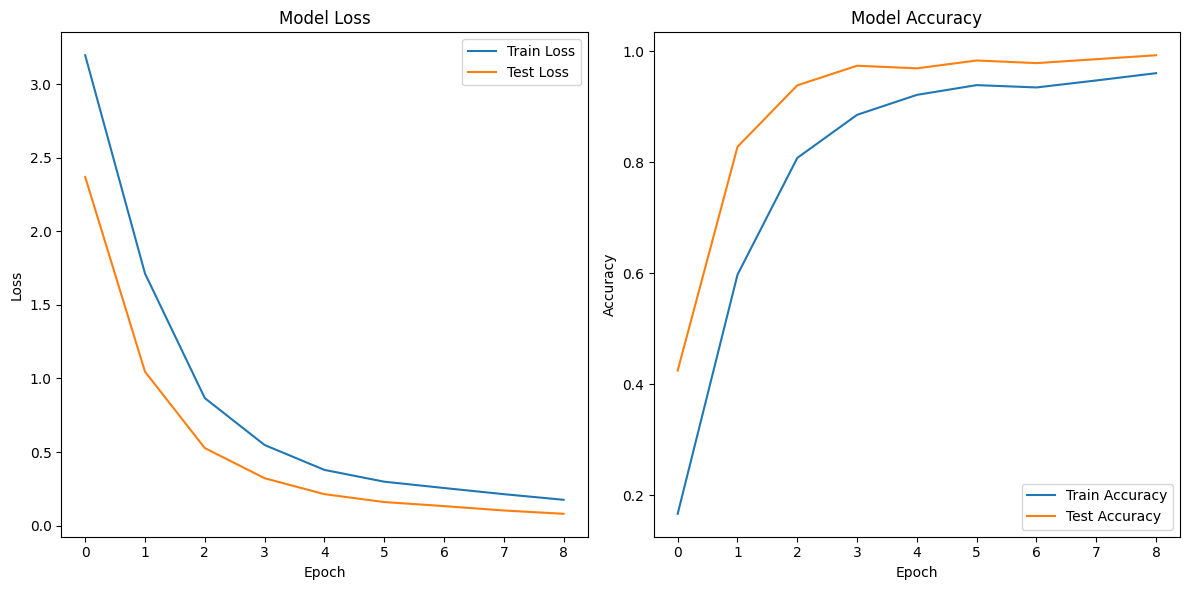

In [291]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Grafik Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Grafik Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [292]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi Test: {accuracy:.2f}")

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9950 - loss: 0.0792
Akurasi Test: 0.99


In [293]:
model.save("model/static/model_1.h5")

In [13]:
np.zeros(8)

array([0., 0., 0., 0., 0., 0., 0., 0.])

## CUSTOM MODE WITHOUT LIBRARY

In [ ]:
import numpy as np

# === Tensor ===
class Tensor:
    def __init__(self, data):
        self.data = np.array(data, dtype=np.float32)
    def shape(self):
        return self.data.shape
    def __repr__(self):
        return str(self.data)

# === Base Layer ===
class Layer:
    def forward(self, input): raise NotImplementedError
    def backward(self, grad_output, learning_rate): raise NotImplementedError

# === Dense Layer ===
class Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(input_size, output_size) * 0.1
        self.biases = np.zeros(output_size)

    def forward(self, input):
        self.input = input
        return np.dot(input, self.weights) + self.biases

    def backward(self, grad_output, learning_rate):
        grad_input = np.dot(grad_output, self.weights.T)
        grad_weights = np.dot(self.input.T, grad_output)
        grad_biases = grad_output.sum(axis=0)

        self.weights -= learning_rate * grad_weights
        self.biases -= learning_rate * grad_biases
        return grad_input

# === ReLU Activation ===
class ReLU(Layer):
    def forward(self, input):
        self.input = input
        return np.maximum(0, input)
    def backward(self, grad_output, learning_rate):
        return grad_output * (self.input > 0)

# === Dropout ===
class Dropout(Layer):
    def __init__(self, rate):
        self.rate = rate
    def forward(self, input):
        self.mask = (np.random.rand(*input.shape) > self.rate).astype(float)
        return input * self.mask
    def backward(self, grad_output, learning_rate):
        return grad_output * self.mask

# === Softmax ===
class Softmax(Layer):
    def forward(self, input):
        exps = np.exp(input - np.max(input, axis=1, keepdims=True))
        self.output = exps / np.sum(exps, axis=1, keepdims=True)
        return self.output
    def backward(self, grad_output, learning_rate):
        return grad_output  # digunakan bersamaan dengan cross-entropy

# === Batch Norm (optional layer) ===
class BatchNorm(Layer):
    def __init__(self, input_size):
        self.gamma = np.ones(input_size)
        self.beta = np.zeros(input_size)
        self.eps = 1e-5

    def forward(self, input):
        self.mean = input.mean(axis=0)
        self.var = input.var(axis=0)
        self.norm = (input - self.mean) / np.sqrt(self.var + self.eps)
        return self.gamma * self.norm + self.beta

    def backward(self, grad_output, learning_rate):
        # Simpler version for illustration
        grad_input = grad_output * self.gamma
        return grad_input

# === Loss: Cross Entropy ===
class CrossEntropy:
    def forward(self, prediction, target):
        self.pred = prediction
        self.target = target
        log_likelihood = -np.log(prediction[range(len(target)), target] + 1e-9)
        return np.mean(log_likelihood)

    def backward(self):
        grad = self.pred.copy()
        grad[range(len(self.target)), self.target] -= 1
        return grad / len(self.target)

# === Optimizer: SGD ===
class SGD:
    def __init__(self, learning_rate=0.01):
        self.lr = learning_rate

# === Model ===
class Model:
    def __init__(self):
        self.layers = []
        self.compiled = False

    def add(self, layer):
        self.layers.append(layer)

    def compile(self, optimizer, loss):
        self.optimizer = optimizer
        self.loss_fn = loss
        self.compiled = True

    def forward(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def backward(self, loss_grad):
        for layer in reversed(self.layers):
            loss_grad = layer.backward(loss_grad, self.optimizer.lr)

    def fit(self, X, y, epochs=10, batch_size=32):
        for epoch in range(epochs):
            loss_total = 0
            for i in range(0, len(X), batch_size):
                x_batch = X[i:i+batch_size]
                y_batch = y[i:i+batch_size]

                output = self.forward(x_batch)
                loss = self.loss_fn.forward(output, y_batch)
                grad = self.loss_fn.backward()
                self.backward(grad)
                loss_total += loss

            avg_loss = loss_total / (len(X) // batch_size)
            acc = self.evaluate(X, y)
            print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}, Accuracy: {acc:.2%}")

    def predict(self, X):
        probs = self.forward(X)
        return np.argmax(probs, axis=1)

    def evaluate(self, X, y):
        pred = self.predict(X)
        return np.mean(pred == y)

# === Simulasi Dataset (Dummy, 3 kelas, 10 fitur) ===
np.random.seed(42)
X = np.random.randn(1000, 10)
y = np.random.randint(0, 3, size=1000)

# === Arsitektur ===
model = Model()
model.add(Dense(10, 64))
model.add(BatchNorm(64))
model.add(ReLU())
model.add(Dropout(0.3))
model.add(Dense(64, 32))
model.add(ReLU())
model.add(Dense(32, 3))
model.add(Softmax())

# === Training ===
model.compile(optimizer=SGD(learning_rate=0.05), loss=CrossEntropy())
model.fit(X, y, epochs=20, batch_size=64)


Epoch 1/20, Loss: 1.1766, Accuracy: 35.00%
Epoch 2/20, Loss: 1.1743, Accuracy: 34.60%
Epoch 3/20, Loss: 1.1711, Accuracy: 34.30%
Epoch 4/20, Loss: 1.1694, Accuracy: 35.60%
Epoch 5/20, Loss: 1.1723, Accuracy: 36.30%
Epoch 6/20, Loss: 1.1670, Accuracy: 37.00%
Epoch 7/20, Loss: 1.1660, Accuracy: 36.70%
Epoch 8/20, Loss: 1.1659, Accuracy: 35.70%
Epoch 9/20, Loss: 1.1698, Accuracy: 37.50%
Epoch 10/20, Loss: 1.1644, Accuracy: 37.10%
Epoch 11/20, Loss: 1.1608, Accuracy: 38.40%
Epoch 12/20, Loss: 1.1661, Accuracy: 39.40%
Epoch 13/20, Loss: 1.1667, Accuracy: 37.30%
Epoch 14/20, Loss: 1.1647, Accuracy: 36.60%
Epoch 15/20, Loss: 1.1654, Accuracy: 40.70%
Epoch 16/20, Loss: 1.1646, Accuracy: 40.10%
Epoch 17/20, Loss: 1.1639, Accuracy: 39.00%
Epoch 18/20, Loss: 1.1611, Accuracy: 38.20%
Epoch 19/20, Loss: 1.1643, Accuracy: 37.70%
Epoch 20/20, Loss: 1.1634, Accuracy: 38.40%


In [11]:
import numpy as np

# ======================= TENSOR & UTILITIES =======================
class Tensor:
    def __init__(self, data):
        self.data = np.array(data, dtype=np.float32)
    def shape(self):
        return self.data.shape
    def __repr__(self):
        return str(self.data)

# ======================= BASE LAYER =======================
class Layer:
    def forward(self, input): raise NotImplementedError
    def backward(self, grad_output, learning_rate): raise NotImplementedError

# ======================= DENSE LAYER =======================
class Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(input_size, output_size) * 0.1
        self.biases = np.zeros(output_size)

    def forward(self, input):
        self.input = input
        return np.dot(input, self.weights) + self.biases

    def backward(self, grad_output, learning_rate):
        grad_input = np.dot(grad_output, self.weights.T)
        grad_weights = np.dot(self.input.T, grad_output)
        grad_biases = grad_output.sum(axis=0)

        self.weights -= learning_rate * grad_weights
        self.biases -= learning_rate * grad_biases
        return grad_input

# ======================= ACTIVATION FUNCTIONS =======================
class ReLU(Layer):
    def forward(self, input):
        self.input = input
        return np.maximum(0, input)

    def backward(self, grad_output, learning_rate):
        return grad_output * (self.input > 0)

class Softmax(Layer):
    def forward(self, input):
        exps = np.exp(input - np.max(input, axis=1, keepdims=True))
        self.output = exps / np.sum(exps, axis=1, keepdims=True)
        return self.output

    def backward(self, grad_output, learning_rate):
        return grad_output  # Gradient will be handled in loss

# ======================= DROPOUT =======================
class Dropout(Layer):
    def __init__(self, rate):
        self.rate = rate

    def forward(self, input):
        self.mask = (np.random.rand(*input.shape) > self.rate).astype(float)
        return input * self.mask

    def backward(self, grad_output, learning_rate):
        return grad_output * self.mask

# ======================= LOSS =======================
class CrossEntropy:
    def forward(self, prediction, target):
        self.pred = prediction
        self.target = target
        log_likelihood = -np.log(prediction[range(len(target)), target] + 1e-9)
        return np.mean(log_likelihood)

    def backward(self):
        grad = self.pred.copy()
        grad[range(len(self.target)), self.target] -= 1
        return grad / len(self.target)

# ======================= OPTIMIZER =======================
class SGD:
    def __init__(self, learning_rate=0.01):
        self.lr = learning_rate

# ======================= MODEL =======================
class Model:
    def __init__(self):
        self.layers = []
        self.compiled = False

    def add(self, layer):
        self.layers.append(layer)

    def compile(self, optimizer, loss):
        self.optimizer = optimizer
        self.loss_fn = loss
        self.compiled = True

    def forward(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x

    def backward(self, grad):
        for layer in reversed(self.layers):
            grad = layer.backward(grad, self.optimizer.lr)

    def fit(self, X, y, epochs=20, batch_size=32):
        for epoch in range(epochs):
            loss_total = 0
            for i in range(0, len(X), batch_size):
                x_batch = X[i:i+batch_size]
                y_batch = y[i:i+batch_size]

                out = self.forward(x_batch)
                loss = self.loss_fn.forward(out, y_batch)
                grad = self.loss_fn.backward()
                self.backward(grad)

                loss_total += loss

            avg_loss = loss_total / (len(X) // batch_size)
            acc = self.evaluate(X, y)
            print(f"Epoch {epoch+1}/{epochs} - Loss: {avg_loss:.4f} - Accuracy: {acc:.2%}")

    def predict(self, X):
        probs = self.forward(X)
        return np.argmax(probs, axis=1)

    def evaluate(self, X, y):
        pred = self.predict(X)
        return np.mean(pred == y)

# ======================= DATA (10 FEATURES, 3 KELAS) =======================
np.random.seed(1)
X = np.random.randn(1000, 10)
y = np.random.randint(0, 3, size=1000)

# ======================= MODEL STRUCTURE =======================
model = Model()
model.add(Dense(10, 64))
model.add(ReLU())
model.add(Dropout(0.2))
model.add(Dense(64, 64))
model.add(ReLU())
model.add(Dense(64, 32))
model.add(ReLU())
model.add(Dense(32, 3))
model.add(Softmax())

model.compile(optimizer=SGD(learning_rate=0.05), loss=CrossEntropy())
model.fit(X, y, epochs=25, batch_size=32)


Epoch 1/25 - Loss: 1.1345 - Accuracy: 34.40%
Epoch 2/25 - Loss: 1.1342 - Accuracy: 35.50%
Epoch 3/25 - Loss: 1.1335 - Accuracy: 36.20%
Epoch 4/25 - Loss: 1.1322 - Accuracy: 37.60%
Epoch 5/25 - Loss: 1.1320 - Accuracy: 37.40%
Epoch 6/25 - Loss: 1.1315 - Accuracy: 36.50%
Epoch 7/25 - Loss: 1.1309 - Accuracy: 37.30%
Epoch 8/25 - Loss: 1.1298 - Accuracy: 38.10%
Epoch 9/25 - Loss: 1.1297 - Accuracy: 37.40%
Epoch 10/25 - Loss: 1.1278 - Accuracy: 37.60%
Epoch 11/25 - Loss: 1.1281 - Accuracy: 40.10%
Epoch 12/25 - Loss: 1.1254 - Accuracy: 41.20%
Epoch 13/25 - Loss: 1.1259 - Accuracy: 39.60%
Epoch 14/25 - Loss: 1.1249 - Accuracy: 40.10%
Epoch 15/25 - Loss: 1.1232 - Accuracy: 39.10%
Epoch 16/25 - Loss: 1.1226 - Accuracy: 40.00%
Epoch 17/25 - Loss: 1.1218 - Accuracy: 40.30%
Epoch 18/25 - Loss: 1.1183 - Accuracy: 39.90%
Epoch 19/25 - Loss: 1.1192 - Accuracy: 40.90%
Epoch 20/25 - Loss: 1.1184 - Accuracy: 41.00%
Epoch 21/25 - Loss: 1.1173 - Accuracy: 41.00%
Epoch 22/25 - Loss: 1.1179 - Accuracy: 41.1

In [2]:
from tensorflow import keras
class CustomModel(keras.Model):
    def train_step(self, data):
     
        # Unpack the data. Its structure depends on your model and
        # on what you pass to `fit()`.
        x, y = data
        
        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # Forward pass
            # Compute the loss value
            # (the loss function is configured in `compile()`)
            loss = self.compute_loss(y=y, y_pred=y_pred)

        # Compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)
        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))
        print(y_pred)
        # Update metrics (includes the metric that tracks the loss)
        for metric in self.metrics:
            if metric.name == "loss":
                metric.update_state(loss)
            else:
                metric.update_state(y, y_pred)
        # Return a dict mapping metric names to current value
        return {m.name: m.result() for m in self.metrics}
import tensorflow as tf

import numpy as np
# Construct and compile an instance of CustomModel
inputs = keras.Input(shape=(32,))
outputs = keras.layers.Dense(1)(inputs)
model = CustomModel(inputs, outputs)
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Just use `fit` as usual
x = np.random.random((1000, 32))
y = np.random.random((1000, 1))
model.fit(x, y, epochs=5)

Epoch 1/5
Tensor("custom_model_1_1/dense_1_1/Add:0", shape=(None, 1), dtype=float32)
Tensor("custom_model_1_1/dense_1_1/Add:0", shape=(None, 1), dtype=float32)
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - mae: 0.6022 - loss: 0.5257  
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - mae: 0.3908 - loss: 0.2382 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - mae: 0.3887 - loss: 0.2276 
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - mae: 0.3680 - loss: 0.2079 
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - mae: 0.3681 - loss: 0.2069 


In [26]:
from tensorflow import keras
class CustomModel(keras.Model):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.loss_tracker = keras.metrics.Mean(name="loss")
        self.mae_metric = keras.metrics.MeanAbsoluteError(name="mae")

    def train_step(self, data):
        x, y = data

        with tf.GradientTape() as tape:
            y_pred = self(x, training=True)  # Forward pass
            # Compute our own loss
            mse_fn = keras.losses.MeanSquaredError()
            loss = mse_fn(y, y_pred)


        # Compute gradients
        trainable_vars = self.trainable_variables
        gradients = tape.gradient(loss, trainable_vars)

        # Update weights
        self.optimizer.apply_gradients(zip(gradients, trainable_vars))

        # Compute our own metrics
        self.loss_tracker.update_state(loss)
        self.mae_metric.update_state(y, y_pred)
        return {"loss": self.loss_tracker.result(), "mae": self.mae_metric.result()}

    @property
    def metrics(self):
        # We list our `Metric` objects here so that `reset_states()` can be
        # called automatically at the start of each epoch
        # or at the start of `evaluate()`.
        # If you don't implement this property, you have to call
        # `reset_states()` yourself at the time of your choosing.
        return [self.loss_tracker, self.mae_metric]


# Construct an instance of CustomModel
inputs = keras.Input(shape=(32,))
outputs = keras.layers.Dense(1)(inputs)
model = CustomModel(inputs, outputs)

# We don't pass a loss or metrics here.
model.compile(optimizer="adam")

# Just use `fit` as usual -- you can use callbacks, etc.
x = np.random.random((1000, 32))
y = np.random.random((1000, 1))
model.fit(x, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 1.3979 - mae: 1.0844 
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6027 - mae: 0.6549 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2892 - mae: 0.4344 
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2081 - mae: 0.3712 
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2093 - mae: 0.3645 


## FILE AND FOLDER EXPLAINED

1. **Data Raw**  
   Lokasi: `csv/static/raw.csv`  
   File ini berisi data landmark mentah yang belum diproses. Setiap baris dalam file ini berisi koordinat landmark yang diperoleh dari input video.

2. **Data Filter**  
   Lokasi: `csv/static/filter.csv`  
   File ini berisi data landmark yang telah difilter untuk menghapus noise dan data yang tidak relevan. Di dalam folder ini, terdapat sublist file yang relevan:
   
   - **`filter_v1.csv`**  
     File ini berisi hasil filter versi 1 yang diterapkan untuk data landmark. Ini mencakup **penghapusan nilai ekstrem dan koreksi posisi yang tidak valid.**
   
   - **`filter_v2.csv`**  
     Versi kedua dari file filter ini mencakup **penghapusan nilai ekstrem dan koreksi posisi yang tidak valid.**
3. **Data Label Terpisah (Separated)**  
   Lokasi: `csv_separated/static/{target}/pure.csv`  
   File ini berisi data landmark mentah yang belum diproses. Setiap baris dalam file ini berisi koordinat landmark yang diperoleh dari input video.
   
[Daftar Isi](#Daftar-Isi)